#GRIP : The Sparks Foundation ( Data Science and Business Analytics Intern )

Name: Divyank Mahalle

Task 2: Prediction the optimum number of clusters and represent it visually using UnSupervised ML

Unsupervised learning can be thought as self learning ,where you do not need to supervised the model, where model have to work on its own to discover information.Unsupervised learning mainly deals with unlabelled data.

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

How hierarchical clustering works
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together.

To identify different species (setosa, versicolor, verginica) of Iris flowers given just 4 features: their sepal and petal lengths and widths. There are 50 observation for each species, total-150.No null value.



Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('TASK 2-(iris) Clustering.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Performing EDA on given dataset

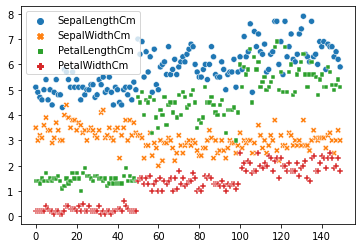

In [ ]:
sns.scatterplot(data=df.iloc[:,1:6])

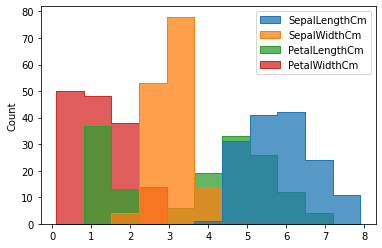

In [ ]:
sns.histplot(data=df.iloc[:,1:6],element="step")

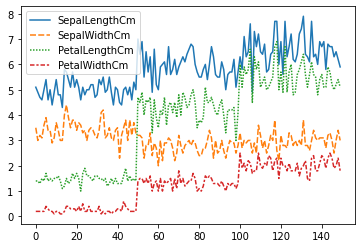

In [ ]:
sns.lineplot(data=df.iloc[:,1:6])

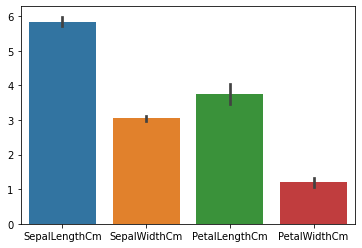

In [ ]:
sns.barplot(data=df.iloc[:,1:6])

Box plot showing the range of various element like sepallength ,etc and we are alos observing median and InterQaurtile range in this graph.

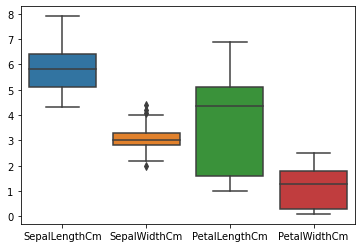

In [ ]:
sns.boxplot(data=df.iloc[:,1:6])

Dis plot/Density plot showing density graph for all elements present in dataset

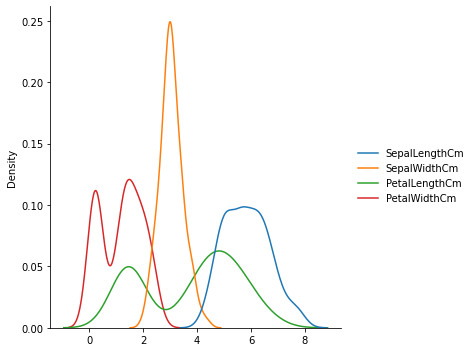

In [ ]:
sns.displot(data=df.iloc[:,1:6],kind='kde')

Pairplot will provide relationship bewteen all paramter in dataset with respect to column Species

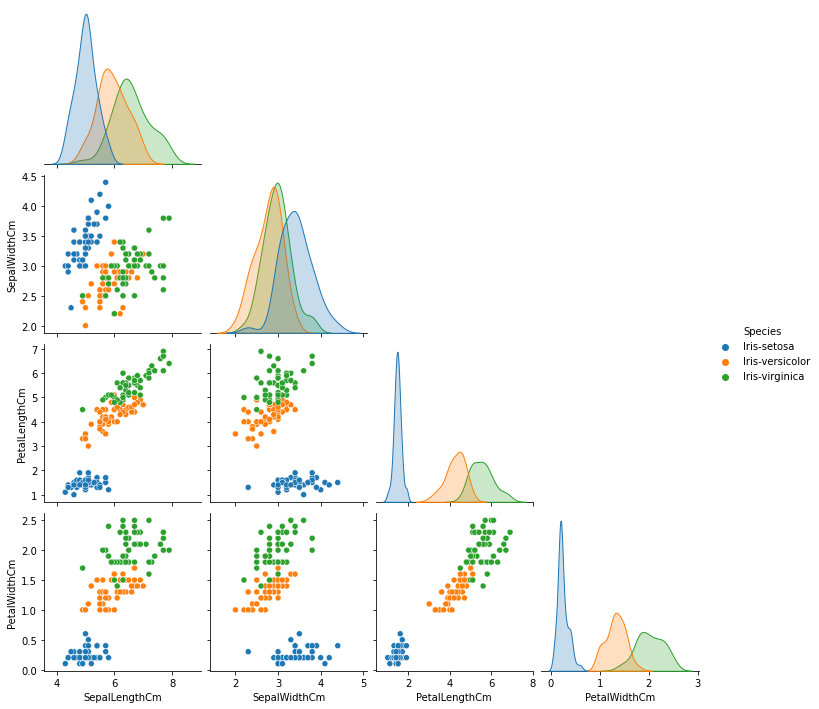

In [ ]:
sns.pairplot(data=df.iloc[:,1:6],corner=True,hue='Species')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'rug'
  **contour_kws,


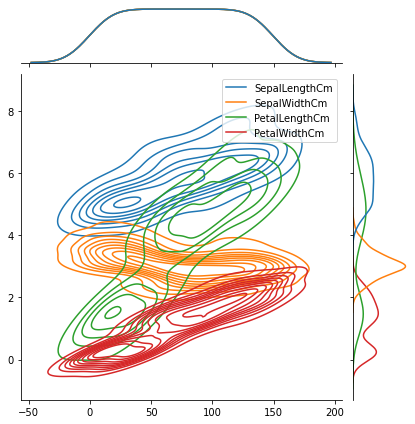

In [ ]:
sns.jointplot(data=df.iloc[:,1:6],kind="kde",rug='True')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Importing the dataset

In [ ]:
X = df.iloc[:, 3:5].values  #We choose Two paramters for Clustering,which are PetalLenght and Petal Width
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

#Using the dendrogram to find the optimal number of clusters

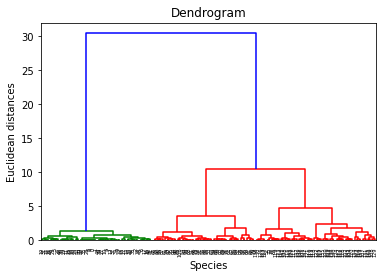

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()


# Training the Hierarchical Clustering model on the dataset



In [ ]:
from sklearn.cluster import AgglomerativeClustering  #Kept Number of cluster to 3 as we need to find 3 Species in different clusters.
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

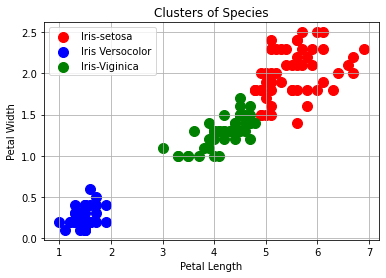

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Iris Versocolor')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Iris-Viginica')


plt.title('Clusters of Species')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid()
plt.show()

**Thank you,The Sparks Foundation**